In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('netflix_titles.csv',lineterminator = '\n')



In [5]:
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description\r
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
  6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [9]:
df['listed_in'].head()


0                      Children & Family Movies, Comedies
1                                         Stand-Up Comedy
2                                                Kids' TV
3                                                Kids' TV
4                                                Comedies
                              ...                        
6229    TV Action & Adventure, TV Comedies, TV Sci-Fi ...
6230                                          TV Comedies
6231                                               Movies
6232             British TV Shows, TV Comedies, TV Dramas
6233                       Classic & Cult TV, TV Comedies
Name: listed_in, Length: 6234, dtype: object

In [13]:
df.duplicated().sum()


np.int64(0)

In [14]:
print(df.isnull().sum())


show_id             0
type                0
title               0
director         1969
cast              570
country           476
date_added         11
release_year        0
rating             10
duration            0
listed_in           0
description\r       0
dtype: int64


In [15]:
print(df.columns)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description\r'],
      dtype='object')


In [17]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')


In [18]:
print(df.isnull().sum())


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description\r    0
dtype: int64


In [19]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6234 non-null   int64         
 1   type          6234 non-null   object        
 2   title         6234 non-null   object        
 3   director      6234 non-null   object        
 4   cast          6234 non-null   object        
 5   country       6234 non-null   object        
 6   date_added    5583 non-null   datetime64[ns]
 7   release_year  6234 non-null   int64         
 8   rating        6234 non-null   object        
 9   duration      6234 non-null   object        
 10  listed_in     6234 non-null   object        
  6234 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 584.6+ KB


In [21]:
df.dropna(subset=['date_added'], inplace=True)


In [22]:
print(df.duplicated().sum())


0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5583 entries, 0 to 5582
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5583 non-null   int64         
 1   type          5583 non-null   object        
 2   title         5583 non-null   object        
 3   director      5583 non-null   object        
 4   cast          5583 non-null   object        
 5   country       5583 non-null   object        
 6   date_added    5583 non-null   datetime64[ns]
 7   release_year  5583 non-null   int64         
 8   rating        5583 non-null   object        
 9   duration      5583 non-null   object        
 10  listed_in     5583 non-null   object        
  5583 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 567.0+ KB


In [24]:
print(df['show_id'].is_unique)


True


In [25]:
df.describe()

,show_id,date_added,release_year
count,5.583000e+03,5583,5583.000000
mean,7.657100e+07,2018-06-28 18:18:14.895217664,2013.082572
min,2.477470e+05,2008-01-01 00:00:00,1925.000000
25%,8.004225e+07,2017-09-29 00:00:00,2013.000000
50%,8.017168e+07,2018-09-15 00:00:00,2016.000000
75%,8.099328e+07,2019-06-04 12:00:00,2018.000000
max,8.123573e+07,2020-01-18 00:00:00,2020.000000
std,1.146217e+07,NaN,9.037215


In [28]:
# Make sure 'year_added' column hai aur clean hai
df['year_added'] = df['date_added'].dt.year
df = df.dropna(subset=['year_added'])

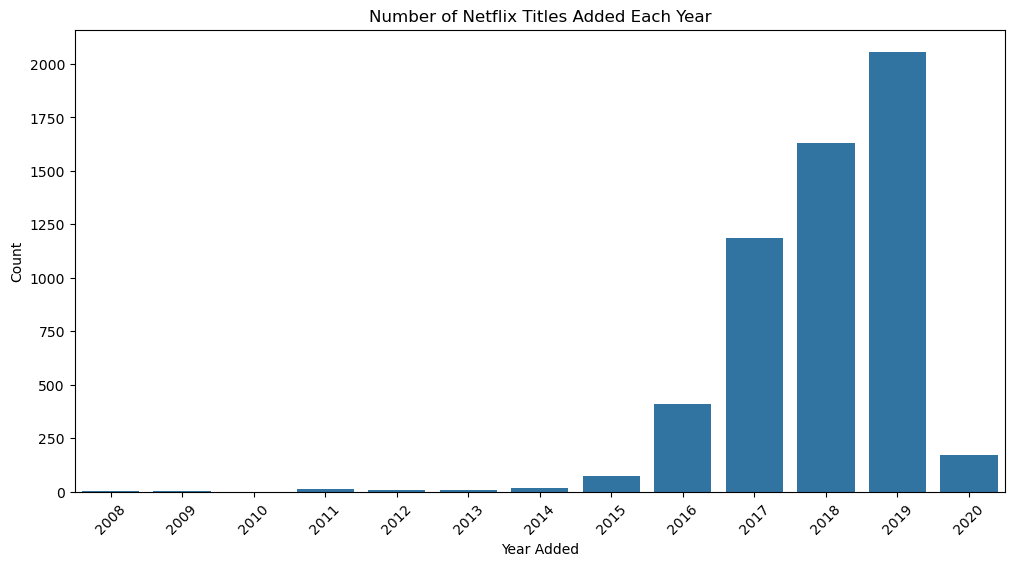

In [30]:
# Step 6: Basic EDA - year-wise content count plot
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='year_added')
plt.title('Number of Netflix Titles Added Each Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


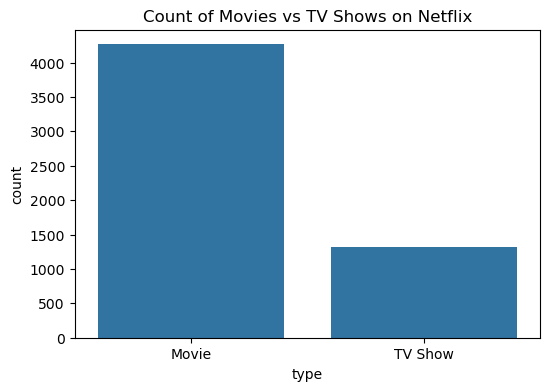

In [32]:
# Step 8: Movie vs TV Show Count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title('Count of Movies vs TV Shows on Netflix')
plt.show()

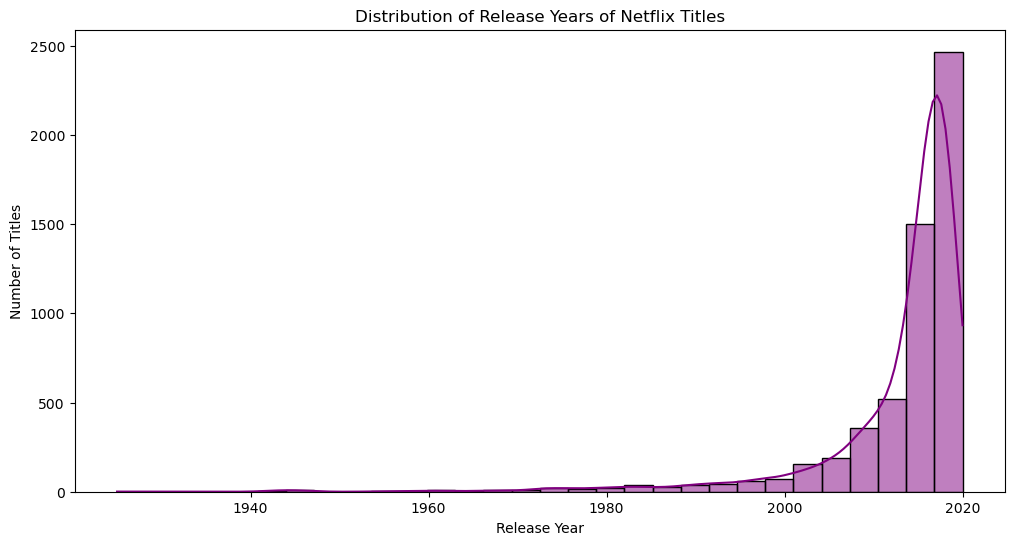

In [33]:
# Step 9: Release Year Distribution
plt.figure(figsize=(12,6))
sns.histplot(df['release_year'], bins=30, kde=True, color='purple')
plt.title('Distribution of Release Years of Netflix Titles')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


In [35]:
genres = df['listed_in'].str.split(', ').explode()


In [36]:
print("Most common genres:\n", genres.value_counts().head(10))


Most common genres:
 listed_in
International Movies        1927
Dramas                      1623
Comedies                    1113
International TV Shows       793
Documentaries                668
Action & Adventure           597
Independent Movies           552
TV Dramas                    414
Thrillers                    392
Children & Family Movies     378
Name: count, dtype: int64


In [37]:
# Split genres and explode
genres = df['listed_in'].str.split(', ').explode()

In [38]:
# Fir print karo top genres
print("Most common genres:\n", genres.value_counts().head(10))

Most common genres:
 listed_in
International Movies        1927
Dramas                      1623
Comedies                    1113
International TV Shows       793
Documentaries                668
Action & Adventure           597
Independent Movies           552
TV Dramas                    414
Thrillers                    392
Children & Family Movies     378
Name: count, dtype: int64


In [39]:
# Step 10: Insights Print karo
print("Total Titles after cleaning:", len(df))
print("Range of years added to Netflix:", df['year_added'].min(), "to", df['year_added'].max())
print("Most common genres:\n", genres.value_counts().head(10))
print("Number of Movies vs TV Shows:\n", df['type'].value_counts())

Total Titles after cleaning: 5583
Range of years added to Netflix: 2008 to 2020
Most common genres:
 listed_in
International Movies        1927
Dramas                      1623
Comedies                    1113
International TV Shows       793
Documentaries                668
Action & Adventure           597
Independent Movies           552
TV Dramas                    414
Thrillers                    392
Children & Family Movies     378
Name: count, dtype: int64
Number of Movies vs TV Shows:
 type
Movie      4264
TV Show    1319
Name: count, dtype: int64
